In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_csv('2020_al_data_kaggle_upload_new_old_syllabi.csv')

In [3]:
df.head()

,index,stream,Zscore,district_rank,island_rank,al_year,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,cgt_r,ge_r,syllabus,birth_day,birth_month,birth_year,gender
0,0,ARTS,-.3550,4336 (NEW),64994 (NEW),2020,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,056,S,new,31,May,2001,female
1,1,ARTS,-.2648,4154 (NEW),62338 (NEW),2020,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,032,C,new,13,January,2002,female
2,2,COMMERCE,-.4760,6910 (NEW),37307 (NEW),2020,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,050,S,new,16,August,2001,female
3,3,COMMERCE,-.1012,5678 (NEW),30449 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,034,S,new,16,August,2001,female
4,4,COMMERCE,.6014,3269 (NEW),17010 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,036,S,new,7,August,2000,female


In [4]:
df.drop(['index', 'district_rank', 'island_rank', 'al_year', 'sub1', 'sub2', 'sub3', 'cgt_r', 'birth_day', 'birth_month', 'birth_year'], axis=1, inplace=True)

In [5]:
df.head()

,stream,Zscore,sub1_r,sub2_r,sub3_r,ge_r,syllabus,gender
0,ARTS,-.3550,S,C,S,S,new,female
1,ARTS,-.2648,S,C,C,C,new,female
2,COMMERCE,-.4760,S,S,S,S,new,female
3,COMMERCE,-.1012,C,C,S,S,new,female
4,COMMERCE,.6014,C,C,B,S,new,female


In [6]:
df.stream = df.stream.map({'ARTS': 0, 'COMMERCE': 1, '-': 2, 'NON': 3, 'PHYSICAL SCIENCE': 4, 'BIOLOGICAL SCIENCE': 5, 'ENGINEERING TECHNOLOGY': 6, 'BIOSYSTEMS TECHNOLOGY': 7})
df.sub1_r = df.sub1_r.map({'S': 0, 'C': 1, 'B': 2, 'F': 3, 'Absent': 4, 'A': 5, 'Withheld': 6})
df.sub2_r = df.sub2_r.map({'S': 0, 'C': 1, 'B': 2, 'F': 3, 'Absent': 4, 'A': 5, 'Withheld': 6})
df.sub3_r = df.sub3_r.map({'S': 0, 'C': 1, 'B': 2, 'F': 3, 'Absent': 4, 'A': 5, 'Withheld': 6})
df.ge_r = df.ge_r.map({'S': 0, 'C': 1, 'B': 2, 'F': 3, 'Absent': 4, 'A': 5, 'Withheld': 6})
df.syllabus = df.syllabus.map({'new': 0, 'old': 1})
df.gender = df.gender.map({'female': 0, 'male': 1, 'Major error': 2})
df.Zscore = pd.to_numeric(df.Zscore, errors='coerce')

In [7]:
df.Zscore = df.Zscore.fillna(df.Zscore.mean())
df.sub3_r = df.sub3_r.fillna(df.sub3_r.mean())
df.gender = df.gender.fillna(df.gender.mean())

In [8]:
df.describe()

,stream,Zscore,sub1_r,sub2_r,sub3_r,ge_r,syllabus,gender
count,337553.000000,337553.000000,337553.000000,337553.000000,337553.000000,337553.000000,337553.000000,337553.000000
mean,2.058604,0.305389,1.869659,1.905002,1.922098,2.443507,0.092851,0.424815
std,1.774128,0.633676,1.612420,1.638040,1.641099,1.582582,0.290223,0.493372
min,0.000000,-1.938300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-0.069100,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,0.305389,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000
75%,2.000000,0.545100,3.000000,3.000000,3.000000,4.000000,0.000000,1.000000
max,7.000000,3.558300,6.000000,6.000000,6.000000,6.000000,1.000000,2.000000


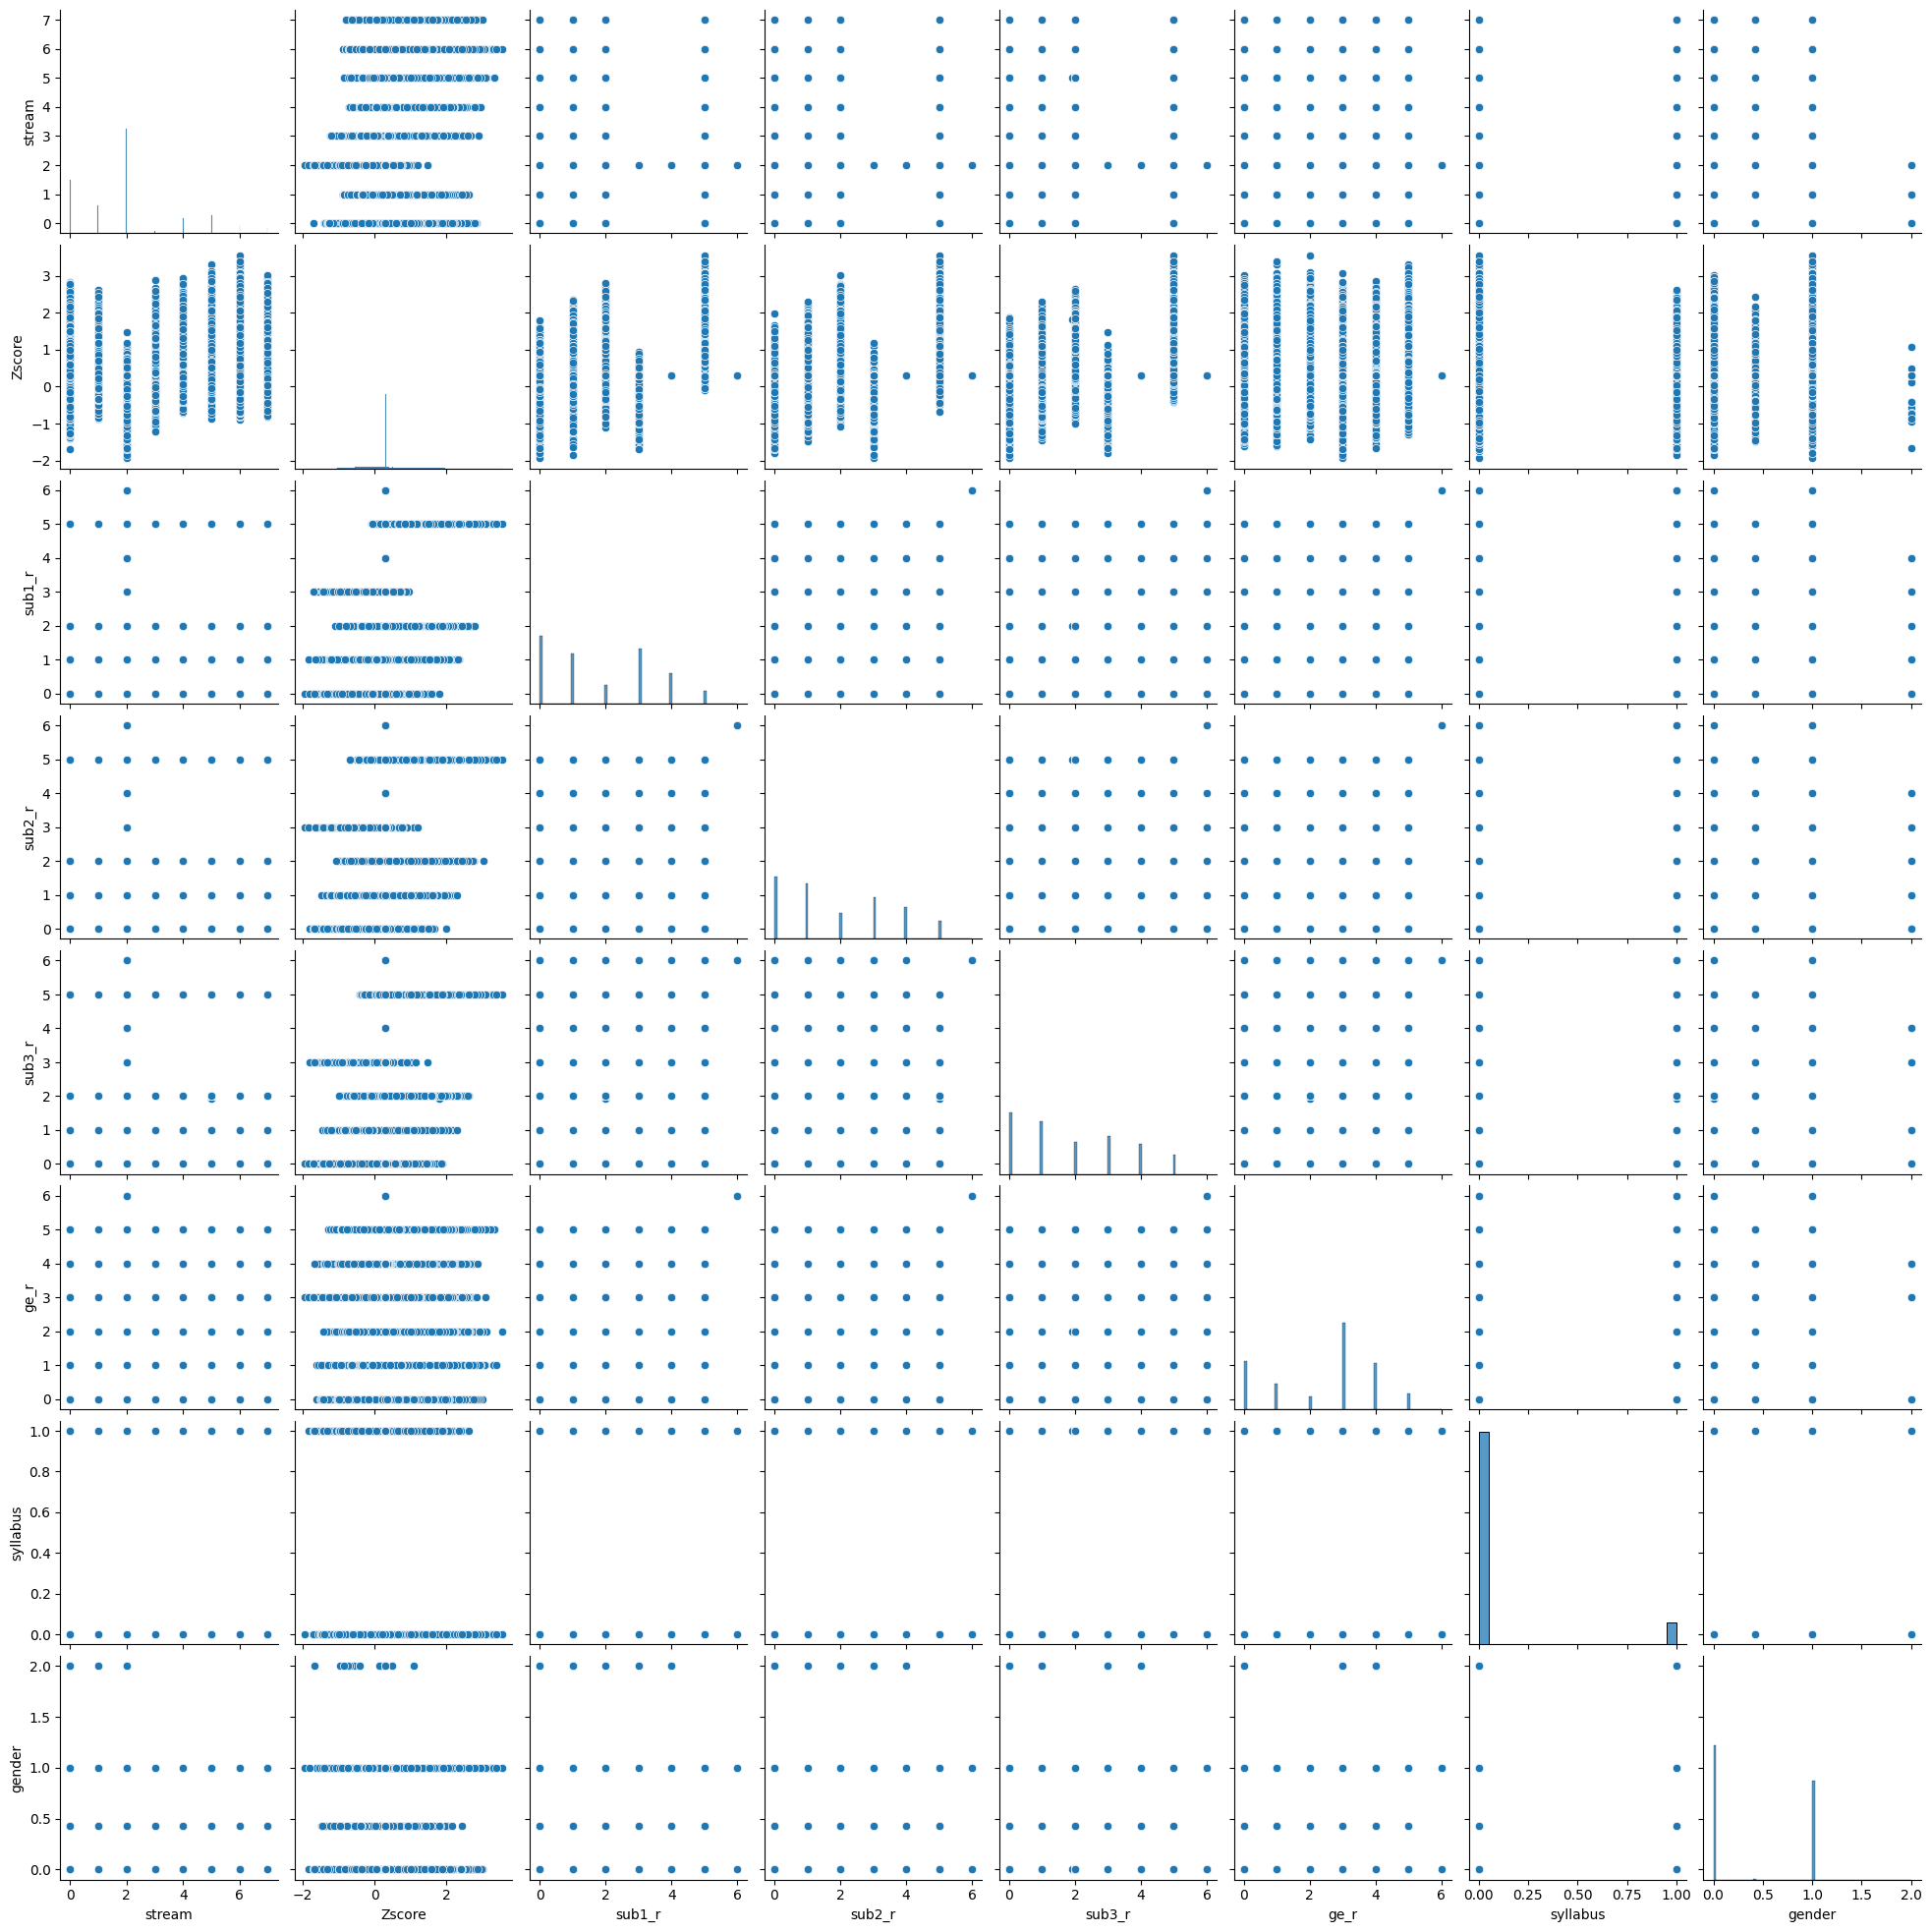

In [9]:
sb.pairplot(df)

In [10]:
data_x = df.drop(['stream', 'Zscore', 'ge_r', 'syllabus', 'gender'], axis=1)
data_y = df.syllabus

In [11]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.1)

In [12]:
decission_tree = tree.DecisionTreeClassifier()

In [13]:
decission_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [14]:
print(f'Score: {round(decission_tree.score(test_x, test_y), 4)*100}%')

Score: 90.62%


In [15]:
syllabus_labels = {0: 'new', 1: 'old'}
score_labels = {0: 'S', 1: 'C', 2: 'B', 3: 'F', 4: 'Absent', 5: 'A', 6: 'Withheld'}
score_sub1 = 4
score_sub2 = 1
score_sub3 = 1

In [16]:
predicted = decission_tree.predict([[score_sub1, score_sub2, score_sub3]])
print(f'Un estudiante con nota de {score_labels[score_sub1]} en la prueba 1, {score_labels[score_sub2]} en la prueba 2 y {score_labels[score_sub3]} en la prueba 3 pertence al grupo de los {syllabus_labels[predicted[0]]}')

Un estudiante con nota de Absent en la prueba 1, C en la prueba 2 y C en la prueba 3 pertence al grupo de los new


d:\Universidad\2023-1\Algoritmica\algoritmica-2023-1\practice_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
